#Import Libraries & Dataset

In [35]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Load Dataset

In [36]:
# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


#Data Cleaning

In [38]:
# Check missing values
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


#Feature Engineering

In [39]:
df["RoomsPerHousehold"] = df["AveRooms"] / df["AveOccup"]

#Feature Selection

In [40]:
# Features
X = df[["MedInc", "Latitude", "Longitude","RoomsPerHousehold", "Population"]]
y = df["MedHouseVal"]

#Split Data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Select important features
selected_features = ["MedInc", "Latitude", "Longitude", "RoomsPerHousehold"]

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Retrain
rf_sel = RandomForestRegressor(n_estimators=200, random_state=42)
rf_sel.fit(X_train_sel, y_train)

# Predictions
y_pred = rf_sel.predict(X_test_sel)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance (after feature selection)")
print("RMSE:", rmse)
print("R² Score:", r2)

📊 Model Performance (after feature selection)
RMSE: 0.4720153338540185
R² Score: 0.8299779083531567


#XGBoost Model

In [43]:
from xgboost import XGBRegressor
# Train XGBoost
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train_sel, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test_sel)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)


# Model Comparison

In [44]:
print("📊 Model Comparison")
print("Random Forest -> RMSE:", rmse, " | R²:", r2)
print("XGBoost       -> RMSE:", rmse_xgb, " | R²:", r2_xgb)

📊 Model Comparison
Random Forest -> RMSE: 0.4720153338540185  | R²: 0.8299779083531567
XGBoost       -> RMSE: 0.45383481123849095  | R²: 0.8428230885838659


#Feature Importance Plot

/tmp/ipython-input-1825716495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="magma")


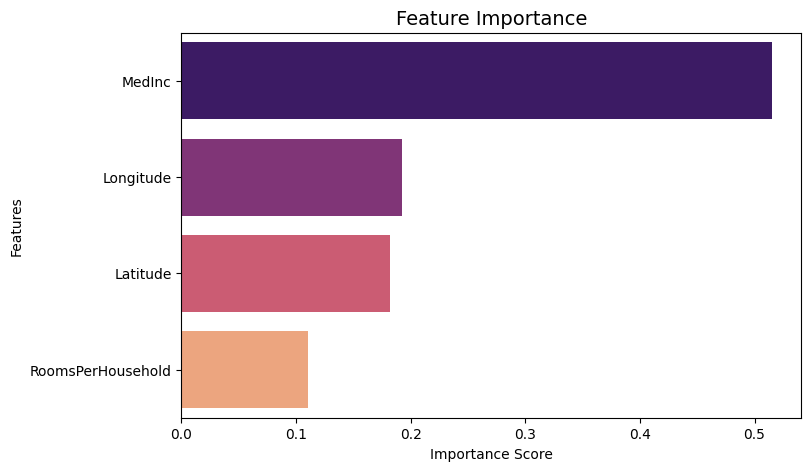

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example with RandomForest
importances = pd.Series(rf_sel.feature_importances_, index=selected_features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette="magma")

plt.title("Feature Importance", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()